In [26]:
import pandas as pd
import xarray as xr
import numpy as np
import scipy.interpolate
import netCDF4
import h5py
import bottleneck
import scipy.ndimage as ndimage

import matplotlib.pyplot as plt
%run ../pyfiles/data_cleaning.py

<Figure size 432x288 with 0 Axes>

In [30]:
!export HDF5_USE_FILE_LOCKING=FALSE

In [31]:
# Import Merged Data from Notebook in Cloud
data = xr.open_mfdataset('final_merge.nc', combine = 'by_coords')

In [32]:
list(data.variables)

['lat',
 'lon',
 'FireMask',
 'MaxFRP',
 'burned',
 'et_500m',
 '_1_km_16_days_EVI',
 '_1_km_16_days_EVI2',
 '_1_km_16_days_NDVI',
 '_1_km_16_days_NIR_reflectance',
 '_1_km_16_days_SWIR1_reflectance',
 '_1_km_16_days_SWIR2_reflectance',
 '_1_km_16_days_SWIR3_reflectance',
 '_1_km_16_days_blue_reflectance',
 '_1_km_16_days_composite_day_of_the_year',
 '_1_km_16_days_green_reflectance',
 '_1_km_16_days_red_reflectance',
 '_1_km_16_days_VI_Quality',
 '_1_km_16_days_pixel_reliability',
 '_DC',
 '_DMC',
 '_FFMC',
 '_ISI',
 '_BUI',
 '_FWI',
 '_DSR']

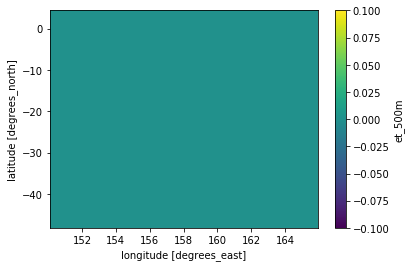

In [39]:
# Check to see that variables from each dataset merged correctly
data['et_500m'].plot()

In [11]:
data = data.to_dataframe()
data.reset_index(inplace = True)

In [12]:
data.head()

,lat,lon,FireMask,MaxFRP,burned,et_500m,_1_km_16_days_EVI,_1_km_16_days_EVI2,_1_km_16_days_NDVI,_1_km_16_days_NIR_reflectance,...,_1_km_16_days_red_reflectance,_1_km_16_days_VI_Quality,_1_km_16_days_pixel_reliability,_DC,_DMC,_FFMC,_ISI,_BUI,_FWI,_DSR
0,4.3625,150.120833,3.0,NaN,0.0,3276.5,0.6110,0.6071,0.8460,0.3885,...,0.0324,2257.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.3625,150.129167,3.0,NaN,0.0,3276.5,0.6779,0.6552,0.9191,0.3916,...,0.0165,35297.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.3625,150.137500,3.0,NaN,0.0,34.5,0.4479,0.4364,0.7350,0.2868,...,0.0438,2257.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.3625,150.145833,3.0,NaN,0.0,3276.5,0.2052,0.2052,0.2365,0.4590,...,0.2834,35033.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.3625,150.154167,3.0,NaN,NaN,22.9,0.5388,0.4754,0.7567,0.3127,...,0.0433,35297.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Export data as clean .nc file
data.to_netcdf('clean_data.nc')